In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
X = train.Item_MRP
Y = train.Item_Outlet_Sales

/Users/suniljacob/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


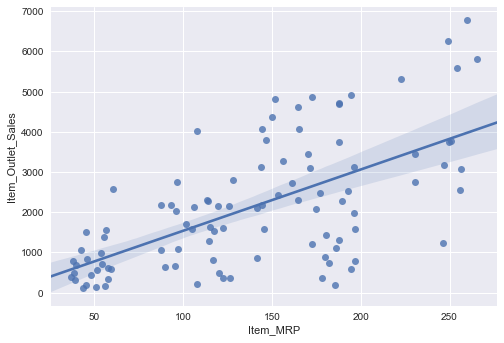

In [6]:
sns.regplot(X[0:100],Y[0:100])

### Model 3 – Enter Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lreg = LinearRegression()

In [9]:
#splitting into training and cv for cross validation
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [10]:
# Sales = 
# Training the model 
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lreg.coef_,lreg.intercept_

(array([-11.53183548,  15.55731591]), 23028.37814924367)

In [12]:
pred=lreg.predict(x_cv)

In [13]:
x_cv[:5]

,Outlet_Establishment_Year,Item_MRP
1031,1997,102.1990
5941,1987,61.6878
4291,1998,172.1422
8131,1985,198.9768
5088,2007,46.1060


In [14]:
y_cv[0:5]

1031    1960.7810
5941    1029.9926
4291     517.3266
8131    4729.8432
5088     792.3020
Name: Item_Outlet_Sales, dtype: float64

If you look above, when **MRP** increases, the sales in **y_cv** increases

In [15]:
mse = np.mean((pred - y_cv)**2)
rmse = np.sqrt(mse)
mse,rmse

(1924232.4486889134, 1387.1670586807177)

In [16]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff
# Therefore, we can see that MRP has a high coefficient, meaning items having higher prices have better sales.

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-11.531835
1,Item_MRP,15.557316


In [17]:
# Evaluating your model
lreg.score(x_cv,y_cv)

0.3324724942505921

R² is 32%, meaning, only 32% of variance in sales is explained by year of establishment and MRP. In other words, if you know year of establishment and the MRP, you’ll have 32% information to make an accurate prediction about its sales

### Model 4 – Linear regression with more variables

In [18]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [19]:
#It produces an error, because item weights column have some missing values. 
#So let us impute it with the mean of other non-null entries.
train['Item_Weight'].fillna((train['Item_Weight'].mean()),inplace=True)

In [20]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
# splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [21]:
#training the model 
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
pred = lreg.predict(x_cv)

In [23]:
mse = np.mean((pred - y_cv)**2)
mse

1925781.008744275

In [24]:
#calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.752419
1,Item_MRP,15.518574
2,Item_Weight,-3.979700


In [25]:
# R squared
lreg.score(x_cv,y_cv)

0.33407230704856594

### Model 5 Using all features

In [26]:
# imputing missing values

train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small',inplace=True)

In [27]:
# creating dummy variables to convert categorical into numeric values
mylist = list(train.select_dtypes(include=['object']).columns)

In [28]:
dummies = pd.get_dummies(train[mylist], prefix= mylist)
train.drop(mylist, axis=1, inplace = True) 
# removing all columns which is having categorical variables (axis=1)

In [29]:
X = pd.concat([train,dummies], axis =1 )

In [30]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [31]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# predicting on cv
pred_cv = lreg.predict(x_cv)

In [33]:
mse = np.mean((pred_cv - y_cv)**2)
mse

2.5445442325214875e-08

In [34]:
lreg.score(x_cv,y_cv)

0.999999999999991

In [35]:
#calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Item_Weight,-3.152511e-14
1,Item_Visibility,2.350897e-11
2,Item_MRP,1.557088e-14
3,Outlet_Establishment_Year,-4.894435e-05
4,Item_Outlet_Sales,1.000000e+00
5,Item_Identifier_DRA12,8.129882e-03
6,Item_Identifier_DRA24,8.902721e-03
7,Item_Identifier_DRA59,8.902721e-03
8,Item_Identifier_DRB01,8.129882e-03
9,Item_Identifier_DRB13,8.902721e-03
